## 载入数据

In [8]:
import sys
import pandas as pd
import numpy as np
data = pd.read_csv('./train.csv', encoding='big5')
data[:18]

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


## 预处理

In [9]:
# 只保留从第三列起的数据
data = data.iloc[:, 3:]
data[data == 'NR'] = 0
raw_data = data.to_numpy()
raw_data

array([['14', '14', '14', ..., '15', '15', '15'],
       ['1.8', '1.8', '1.8', ..., '1.8', '1.8', '1.8'],
       ['0.51', '0.41', '0.39', ..., '0.35', '0.36', '0.32'],
       ...,
       ['36', '55', '72', ..., '118', '100', '105'],
       ['1.9', '2.4', '1.9', ..., '1.5', '2', '2'],
       ['0.7', '0.8', '1.8', ..., '1.6', '1.8', '2']], dtype=object)

## 提取特征

In [10]:
month_data = {}
for month in range(12):
  # 每个月共20*24=480份数据，共18种空气成分，每一种成分每月都有480份数据，因此初始化一个18*480的array
  temp_data = np.empty([18,480])
  for day in range(20):
    # temp_data中加入第day天的数据，由于每天都有24份数据共24列,故列的范围是24*day~24*(day+1)；选择加入temp_data的是第20×month+day这一天的数据，由于每天有18种大气成分的数据共18行，因此行的范围是18*(20*month+day)~18*(20*month+day+1)
    temp_data[:, 24 * day : 24 * (day + 1)] = raw_data[18 * (20 * month + day) : 18 * (20 * month + day + 1)]
  # 把这个月的data放进month_data[month]里去
  month_data[month]=temp_data

# 查看第一个月的数据，并借此查看数据的结构：每一行都是一种大气成分在24*20个连续小时内的值
month_data[0]

array([[14.  , 14.  , 14.  , ..., 14.  , 13.  , 13.  ],
       [ 1.8 ,  1.8 ,  1.8 , ...,  1.8 ,  1.8 ,  1.8 ],
       [ 0.51,  0.41,  0.39, ...,  0.34,  0.41,  0.43],
       ...,
       [35.  , 79.  ,  2.4 , ..., 48.  , 63.  , 53.  ],
       [ 1.4 ,  1.8 ,  1.  , ...,  1.1 ,  1.9 ,  1.9 ],
       [ 0.5 ,  0.9 ,  0.6 , ...,  1.2 ,  1.2 ,  1.3 ]])

In [27]:
# 每个月有480小时，每9个小时形成一个data，每个月有471个data，则总data数为471*12(第10小时的PM2.5)。
# 每一笔data，前9h是input，最后1h的PM2.5是output，因此input是一个18*9的矩阵，如果摊平就是一个18*9的feature vector(特征向量)
x = np.empty([12 * 471, 18 * 9], dtype=float)
y = np.empty([12 * 471, 1], dtype=float)

for month in range(12):
  for i in range(471):
    # 18行代表18种物质，10列代表10小时的数据，包括input和output，18 * 10的矩阵存放training data
    temp = np.empty([18, 10])
    # 第i笔data的范围是i~i+9，共10列
    temp = month_data[month][:, i : i + 10]
    # 将temp的前9列作为input的数据，用reshape平摊到一个18*9的行向量上
    x[471 * month + i, :] = temp[:, 0 : 9].reshape(1, -1)
    # 将temp的第10列作为output，只有第10列的PM2.5的值是有用的
    y[471 * month + i] = temp[9, 9]

print(x)
print(y)

[[14.  14.  14.  ...  2.   2.   0.5]
 [14.  14.  13.  ...  2.   0.5  0.3]
 [14.  13.  12.  ...  0.5  0.3  0.8]
 ...
 [17.  18.  19.  ...  1.1  1.4  1.3]
 [18.  19.  18.  ...  1.4  1.3  1.6]
 [19.  18.  17.  ...  1.3  1.6  1.8]]
[[30.]
 [41.]
 [44.]
 ...
 [17.]
 [24.]
 [29.]]


## 正则化

In [28]:
# 求出方差和标准差，利用公式x'=(x-u)/σ来使同一列的数据同时满足同一个分布
# axis=0表示逐行，即每一列
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
# 对每个feature都进行正则化处理
for i in range(len(x)):
  for j in range(len(x[0])):
    if std_x[j] != 0:
      x[i][j] = (x[i][j] - mean_x[j]) / std_x[j]
x

array([[-1.35825331, -1.35883937, -1.359222  , ...,  0.26650729,
         0.2656797 , -1.14082131],
       [-1.35825331, -1.35883937, -1.51819928, ...,  0.26650729,
        -1.13963133, -1.32832904],
       [-1.35825331, -1.51789368, -1.67717656, ..., -1.13923451,
        -1.32700613, -0.85955971],
       ...,
       [-0.88092053, -0.72262212, -0.56433559, ..., -0.57693779,
        -0.29644471, -0.39079039],
       [-0.7218096 , -0.56356781, -0.72331287, ..., -0.29578943,
        -0.39013211, -0.1095288 ],
       [-0.56269867, -0.72262212, -0.88229015, ..., -0.38950555,
        -0.10906991,  0.07797893]])

## 将数据集分为“训练集”和“验证集”

In [22]:
# 为了有效衡量testing data的bias对结果的影响，切出一块validation set
import math
x_train_set = x[: math.floor(len(x) * 0.8), :]
y_train_set = y[: math.floor(len(y) * 0.8), :]
x_validation_set = x[math.floor(len(x) * 0.8): , :]
y_validation_set = y[math.floor(len(y) * 0.8): , :]

print('x_train_set len: ' + str(len(x_train_set)) + '\n')
print(x_train_set)
print('y_train_set len: ' + str(len(y_train_set)) + '\n')
print(y_train_set)
print('x_validation_set len: ' + str(len(x_validation_set)) + '\n')
print(x_validation_set)
print('y_validation_set len: ' + str(len(y_validation_set)) + '\n')
print(y_validation_set)

x_train_set len: 4521

[[-1.35825331 -1.35883937 -1.359222   ...  0.26650729  0.2656797
  -1.14082131]
 [-1.35825331 -1.35883937 -1.51819928 ...  0.26650729 -1.13963133
  -1.32832904]
 [-1.35825331 -1.51789368 -1.67717656 ... -1.13923451 -1.32700613
  -0.85955971]
 ...
 [ 0.86929969  0.70886668  0.38952809 ...  1.39110073  0.2656797
  -0.39079039]
 [ 0.71018876  0.39075806  0.07157353 ...  0.26650729 -0.39013211
  -0.39079039]
 [ 0.3919669   0.07264944  0.07157353 ... -0.38950555 -0.39013211
  -0.85955971]]
y_train_set len: 4521

[[30.]
 [41.]
 [44.]
 ...
 [ 7.]
 [ 5.]
 [14.]]
x_validation_set len: 1131

[[ 0.07374504  0.07264944  0.07157353 ... -0.38950555 -0.85856912
  -0.57829812]
 [ 0.07374504  0.07264944  0.23055081 ... -0.85808615 -0.57750692
   0.54674825]
 [ 0.07374504  0.23170375  0.23055081 ... -0.57693779  0.54674191
  -0.1095288 ]
 ...
 [-0.88092053 -0.72262212 -0.56433559 ... -0.57693779 -0.29644471
  -0.39079039]
 [-0.7218096  -0.56356781 -0.72331287 ... -0.29578943 -0.39

## 实现linear regression

[[ 2.13717172e+01]
 [ 3.89704137e-01]
 [-8.69158577e-01]
 [ 1.13910392e+00]
 [-1.66554981e+00]
 [-3.35440793e-02]
 [ 1.00454149e+00]
 [-4.07871851e-01]
 [-1.68134666e+00]
 [ 2.03730409e+00]
 [-2.93966010e-01]
 [ 1.50368717e-01]
 [ 8.47054451e-02]
 [ 8.99742441e-02]
 [ 1.32973465e-03]
 [-3.07722947e-02]
 [-1.82012548e-01]
 [ 1.56078126e-01]
 [ 5.13574622e-01]
 [ 5.31093187e-02]
 [-2.74965536e-02]
 [ 6.30877667e-02]
 [-1.61150155e-01]
 [ 1.51574708e-01]
 [-2.19361902e-02]
 [-1.66795024e-01]
 [ 8.06891659e-02]
 [ 4.04969449e-01]
 [-2.93669125e-01]
 [ 3.93209943e-01]
 [-2.56681421e-01]
 [ 2.89770363e-01]
 [ 3.37443615e-01]
 [-5.17161478e-01]
 [ 8.16985114e-02]
 [ 1.68023304e-01]
 [ 7.88983191e-02]
 [ 1.10776932e-01]
 [ 9.91331024e-02]
 [ 2.10741063e-01]
 [-9.16360984e-01]
 [-4.51880915e-01]
 [-5.24666371e-01]
 [-7.85534386e-02]
 [-4.13577279e-01]
 [-5.78247909e-01]
 [ 3.28284900e-01]
 [-1.18113922e-01]
 [-3.09248519e-01]
 [-2.44615884e+00]
 [-1.41940395e+00]
 [-8.88400575e-01]
 [-6.7149196

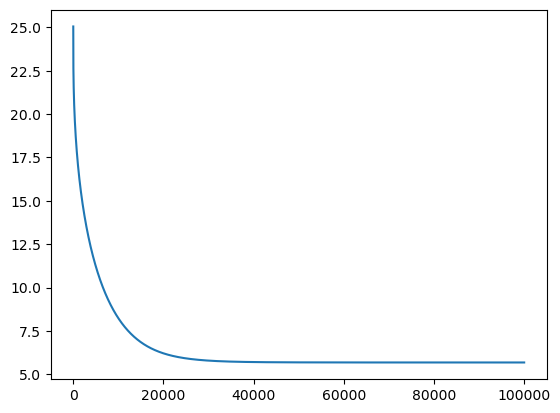

In [23]:
# y = w1*x1+w2*x2+...+b
# 由于常数项的存在，dimension需要在18*9的基础上加上一维，初始化每一维对应的weight为0，并进行gradient descent，经过多次iteration来学习
import matplotlib.pyplot as plt

dim = 18 * 9 +1
w = np.zeros([dim, 1])
# 在原x上加上一个常数feature=1，用一个全1的列向量，并使用axis=1来横向拼接
x = np.concatenate((np.ones([12 * 471, 1]), x), axis=1).astype(float)

# 初始化learning rate
learning_rate = 0.1
# 设定迭代次数
iter_time = 100000
# adagrad表达式为w'=w-lr*gd/sqrt(Σgd^2))，为了避免分母为0，加上一个很小的eps
adagrad = np.zeros([dim, 1])
# eps是在函数程序中事先声明的常量，是控制迭代精度的，相当于微积分里面的无限小值
eps = 0.0000000001
root_mean_square = np.empty([iter_time, 1])

# loss function = (x*w-y)^2, loss对w求导为2*w*(x*w-y),即gradient
for i in range(iter_time):
  # 计算loss、gradient和adagrad
  loss = np.sum(np.power(np.dot(x, w) - y, 2))
  gradient = 2 * np.dot(x.transpose(), np.dot(x, w) - y)
  adagrad += gradient ** 2
  # 更新w，这里的gradient、adagrad都是列向量，加减乘除的用法和常数一样
  w = w - learning_rate * gradient / np.sqrt(adagrad + eps)
  # 计算root mean square
  root_mean_square[i][0] = np.sqrt(np.sum(np.power((np.dot(x, w) - y), 2)) / (471 * 12))

np.save('weight_adagrad.npy', w)
print(w)

plt.plot(range(len(root_mean_square)), root_mean_square)
plt.show()

In [29]:
test = pd.read_csv('./test.csv', header=None, encoding='big5')
test_data = test.iloc[:, 2:]
test_data[test_data == 'NR'] = 0
test_data = test_data.to_numpy()
test_x = np.empty([240, 18 * 9], dtype=float)
for i in range(240):
  test_x[i, :] = test_data[18 * i : 18 * (i + 1), :].reshape(1, -1)
for i in range(len(test_x)):
  for j in range(len(test_x[0])):
    if std_x[j] != 0:
      test_x[i][j] = (test_x[i][j] - mean_x[j]) / std_x[j]
test_x = np.concatenate((np.ones([240, 1]), test_x), axis=1).astype(float)
test_x

<ipython-input-29-22feb090daf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[test_data == 'NR'] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3713: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


array([[ 1.        , -0.24447681, -0.24545919, ..., -0.67065391,
        -1.04594393,  0.07797893],
       [ 1.        , -1.35825331, -1.51789368, ...,  0.17279117,
        -0.10906991, -0.48454426],
       [ 1.        ,  1.5057434 ,  1.34508393, ..., -1.32666675,
        -1.04594393, -0.57829812],
       ...,
       [ 1.        ,  0.3919669 ,  0.54981237, ...,  0.26650729,
        -0.20275731,  1.20302531],
       [ 1.        , -1.8355861 , -1.8360023 , ..., -1.04551839,
        -1.13963133, -1.14082131],
       [ 1.        , -1.35825331, -1.35883937, ...,  2.98427476,
         3.26367657,  1.76554849]])

In [30]:
w = np.load('./weight_adagrad.npy')
predict_y = np.dot(test_x, w)
predict_y

array([[  6.52568997],
       [ 18.17109423],
       [ 24.4351786 ],
       [  7.68136319],
       [ 27.0971071 ],
       [ 22.11149941],
       [ 23.71930572],
       [ 30.73139237],
       [ 16.87593574],
       [ 59.54201961],
       [ 11.76138258],
       [  9.34394806],
       [ 63.25283695],
       [ 53.24384545],
       [ 22.07466703],
       [ 12.20598043],
       [ 32.35208398],
       [ 66.67046817],
       [ -0.51200933],
       [ 17.12338027],
       [ 41.88436833],
       [ 72.3123747 ],
       [  9.24487659],
       [ 17.9462319 ],
       [ 14.72119406],
       [ 38.19312387],
       [ 14.84796843],
       [ 62.85225165],
       [  7.23571351],
       [ 55.5393414 ],
       [ 24.40378671],
       [  8.660094  ],
       [  2.55715904],
       [ 18.67866107],
       [ 27.65996325],
       [ 37.24420368],
       [ 43.33033569],
       [ 29.6766152 ],
       [ 41.91724329],
       [ 35.41124746],
       [  7.70854003],
       [ 41.1862286 ],
       [ 30.44237838],
       [ 51

In [ ]:
import csv
with open('predict_adagrad.csv', mode='w', newline='') as predict_file:
  csv_writer = csv.writer(predict_file)
  header = ['id', 'value']
  print(header)
  csv_writer.writerow(header)
  for i in range(240):
    row = ['id' + str(i), predict_y[i][0]]
    csv_writer.writerow(row)
    print(row)